# Рубежный контроль №1
# Аброчнов Егор
# Группа ИУ5Ц-83Б
# Вариант 29

## Задание: Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?

### Импортируем библиотеки:

In [1]:
import sys
sys.path
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Загрузим данные:

In [2]:
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Узнаем типы полей датасета:

In [4]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### Найдем пропуски:

In [5]:
for col_empty in df.columns:
    empty_count = df[df[col_empty].isnull()].shape[0]
    print('{} - {}'.format(col_empty, empty_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


Пропусков не обнаружено
### Построим корреляционную матрицу:

<Axes: >

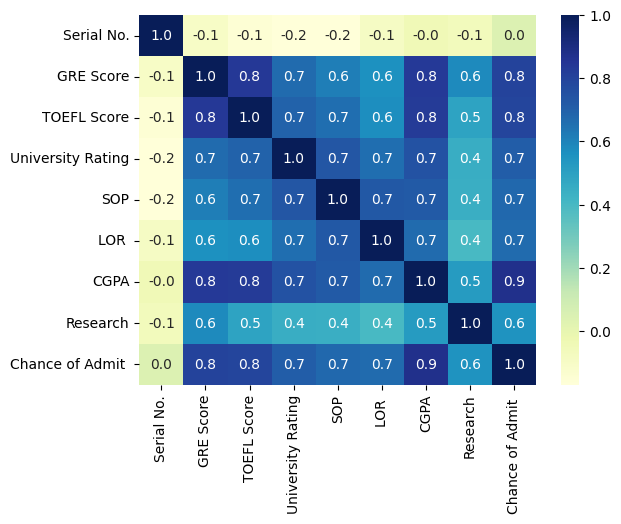

In [6]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f')

<Axes: >

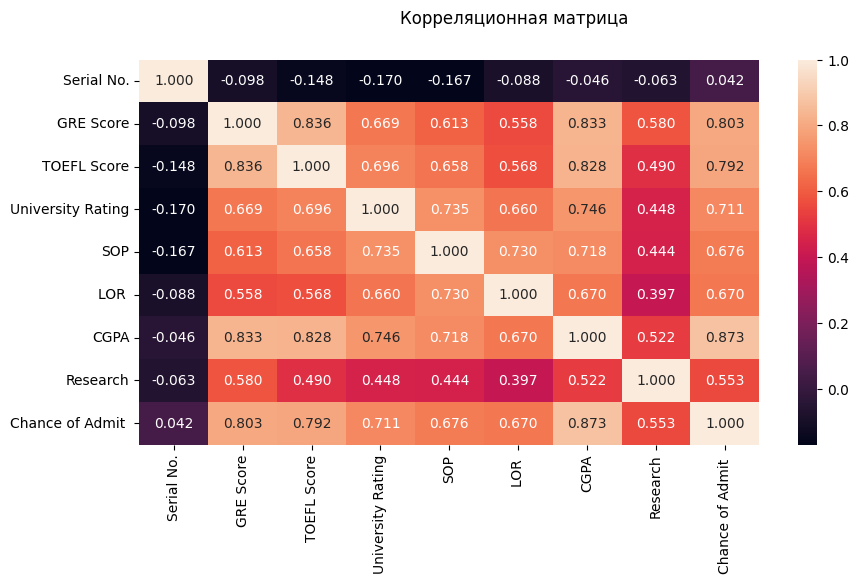

In [7]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f')

### Диграмма рассеяния

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


<Axes: xlabel='Serial No.', ylabel='GRE Score'>

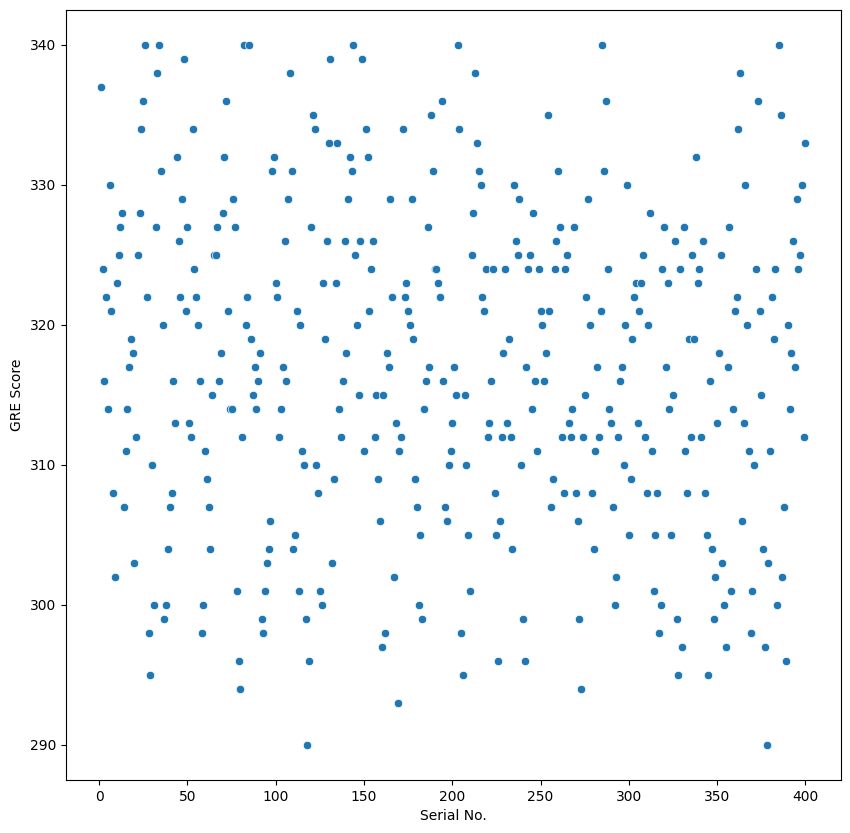

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Serial No.', y='GRE Score', data=df)

Отсюда видно, что основная часть колледжей содержит очки GRE в промежутке 300-330

<Axes: xlabel='Serial No.', ylabel='GRE Score'>

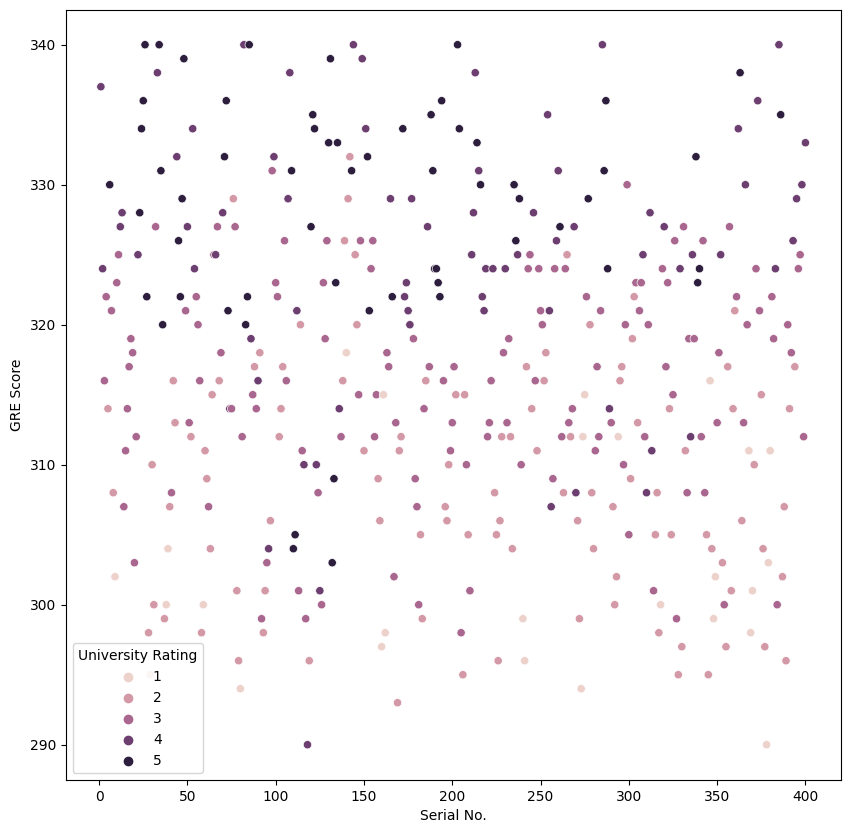

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Serial No.', y='GRE Score', data=df, hue='University Rating')

Основная часть высокооцененных колледжей имеет больше 320 очков GRE, но видно, что встречаются высокооцененные с очками ниже 310.

### Гистограмма

<Axes: xlabel='University Rating', ylabel='Count'>

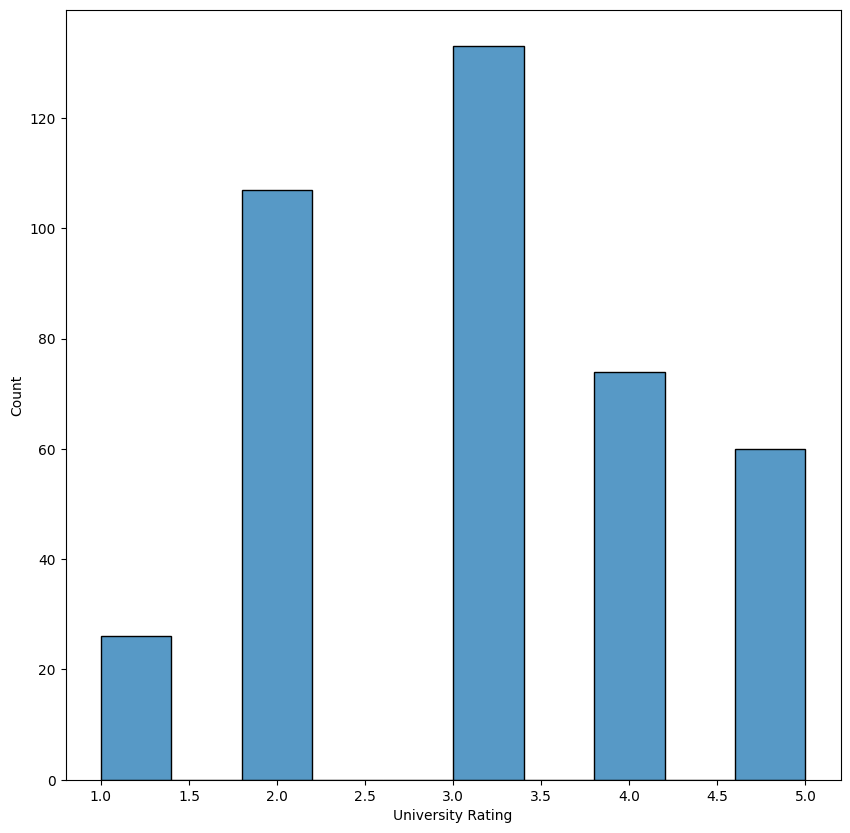

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(df['University Rating'])

Больше всего колледжей оценено на 3.

### Jointplot

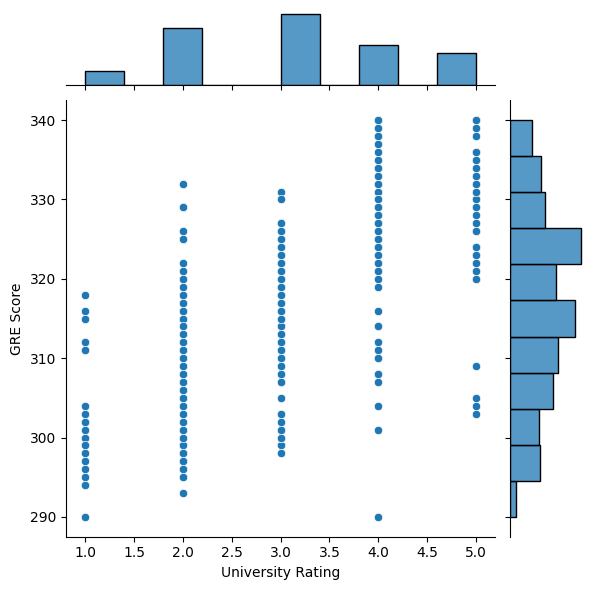

In [18]:
sns.jointplot(x='University Rating', y='GRE Score', data=df)

Комбинация диаграммы рассеивания и гистрограммы.

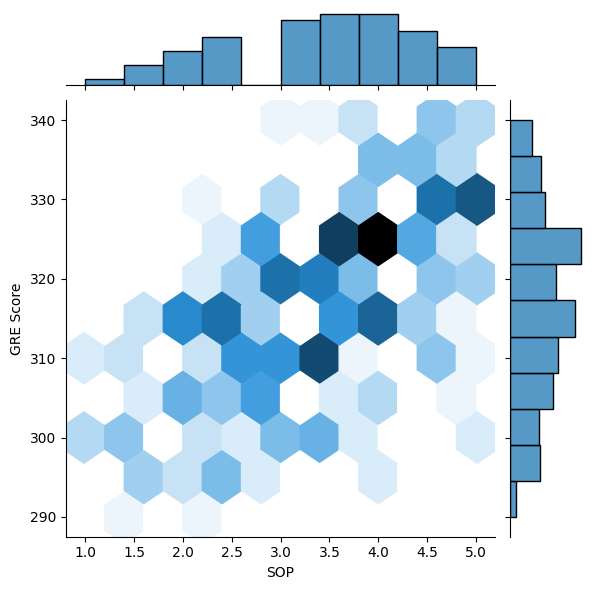

In [20]:
sns.jointplot(x='SOP', y='GRE Score', data=df, kind='hex')

### Парные диаграммы

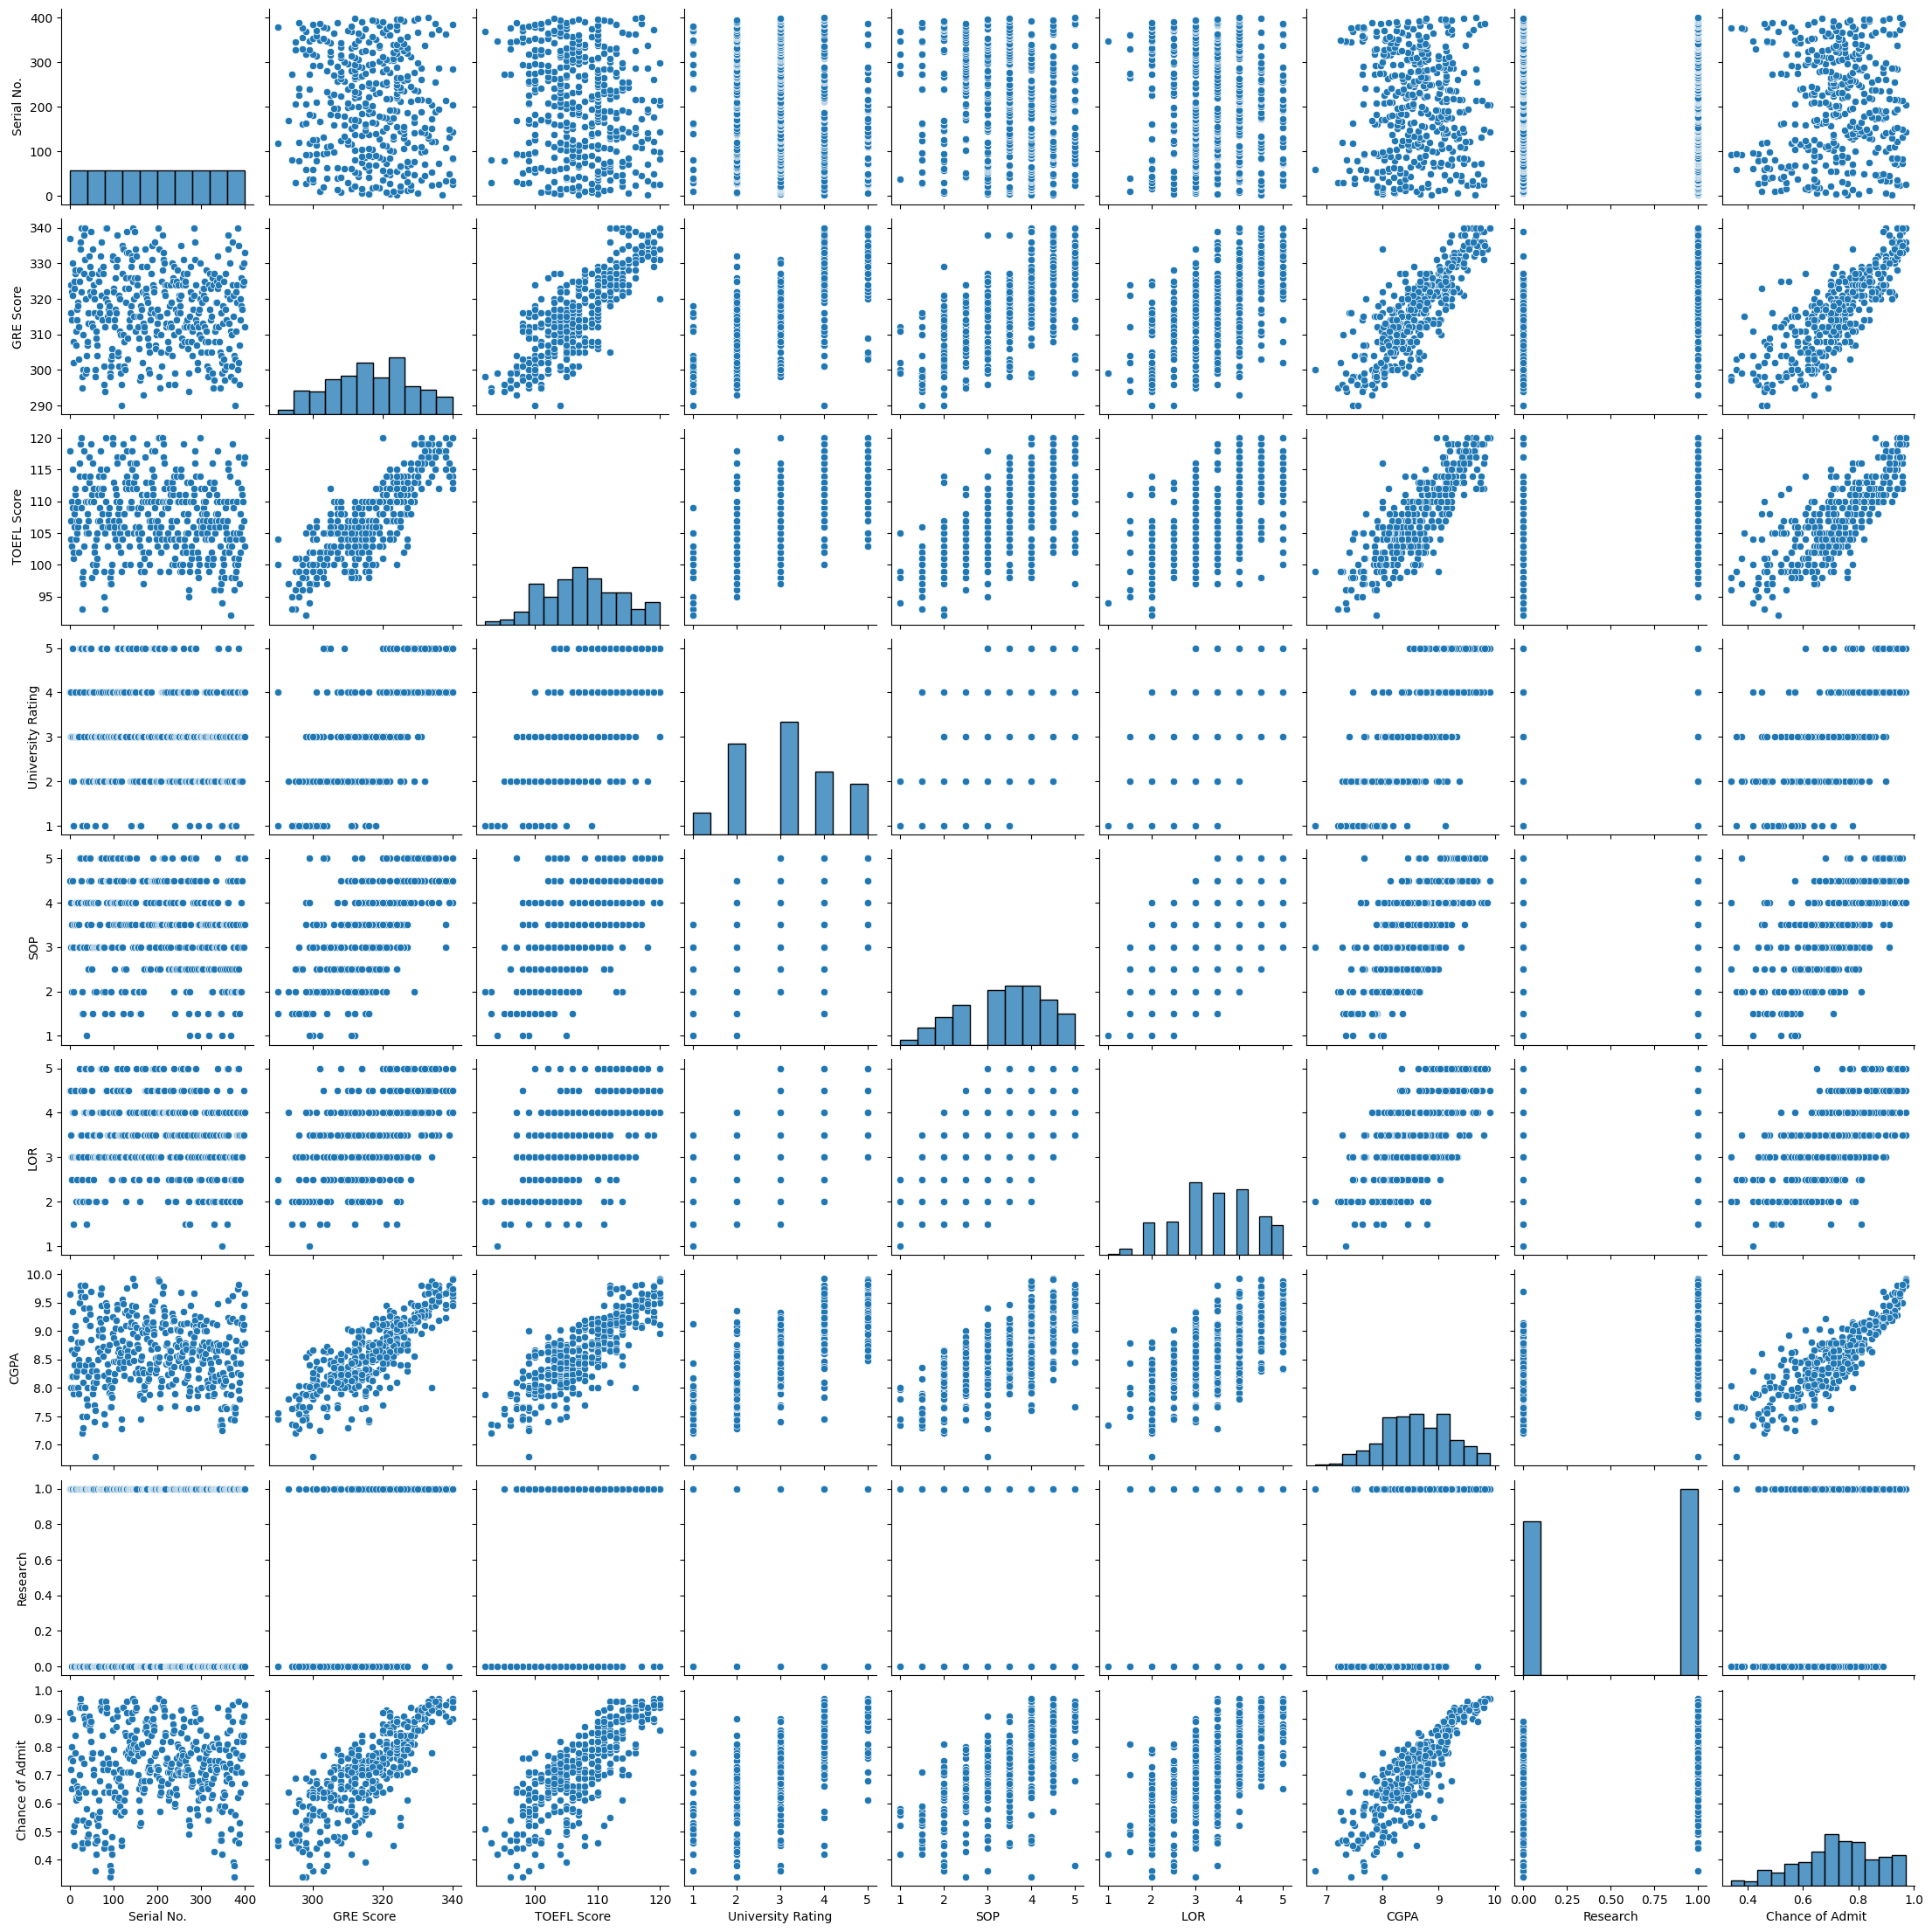

In [21]:
sns.pairplot(df)

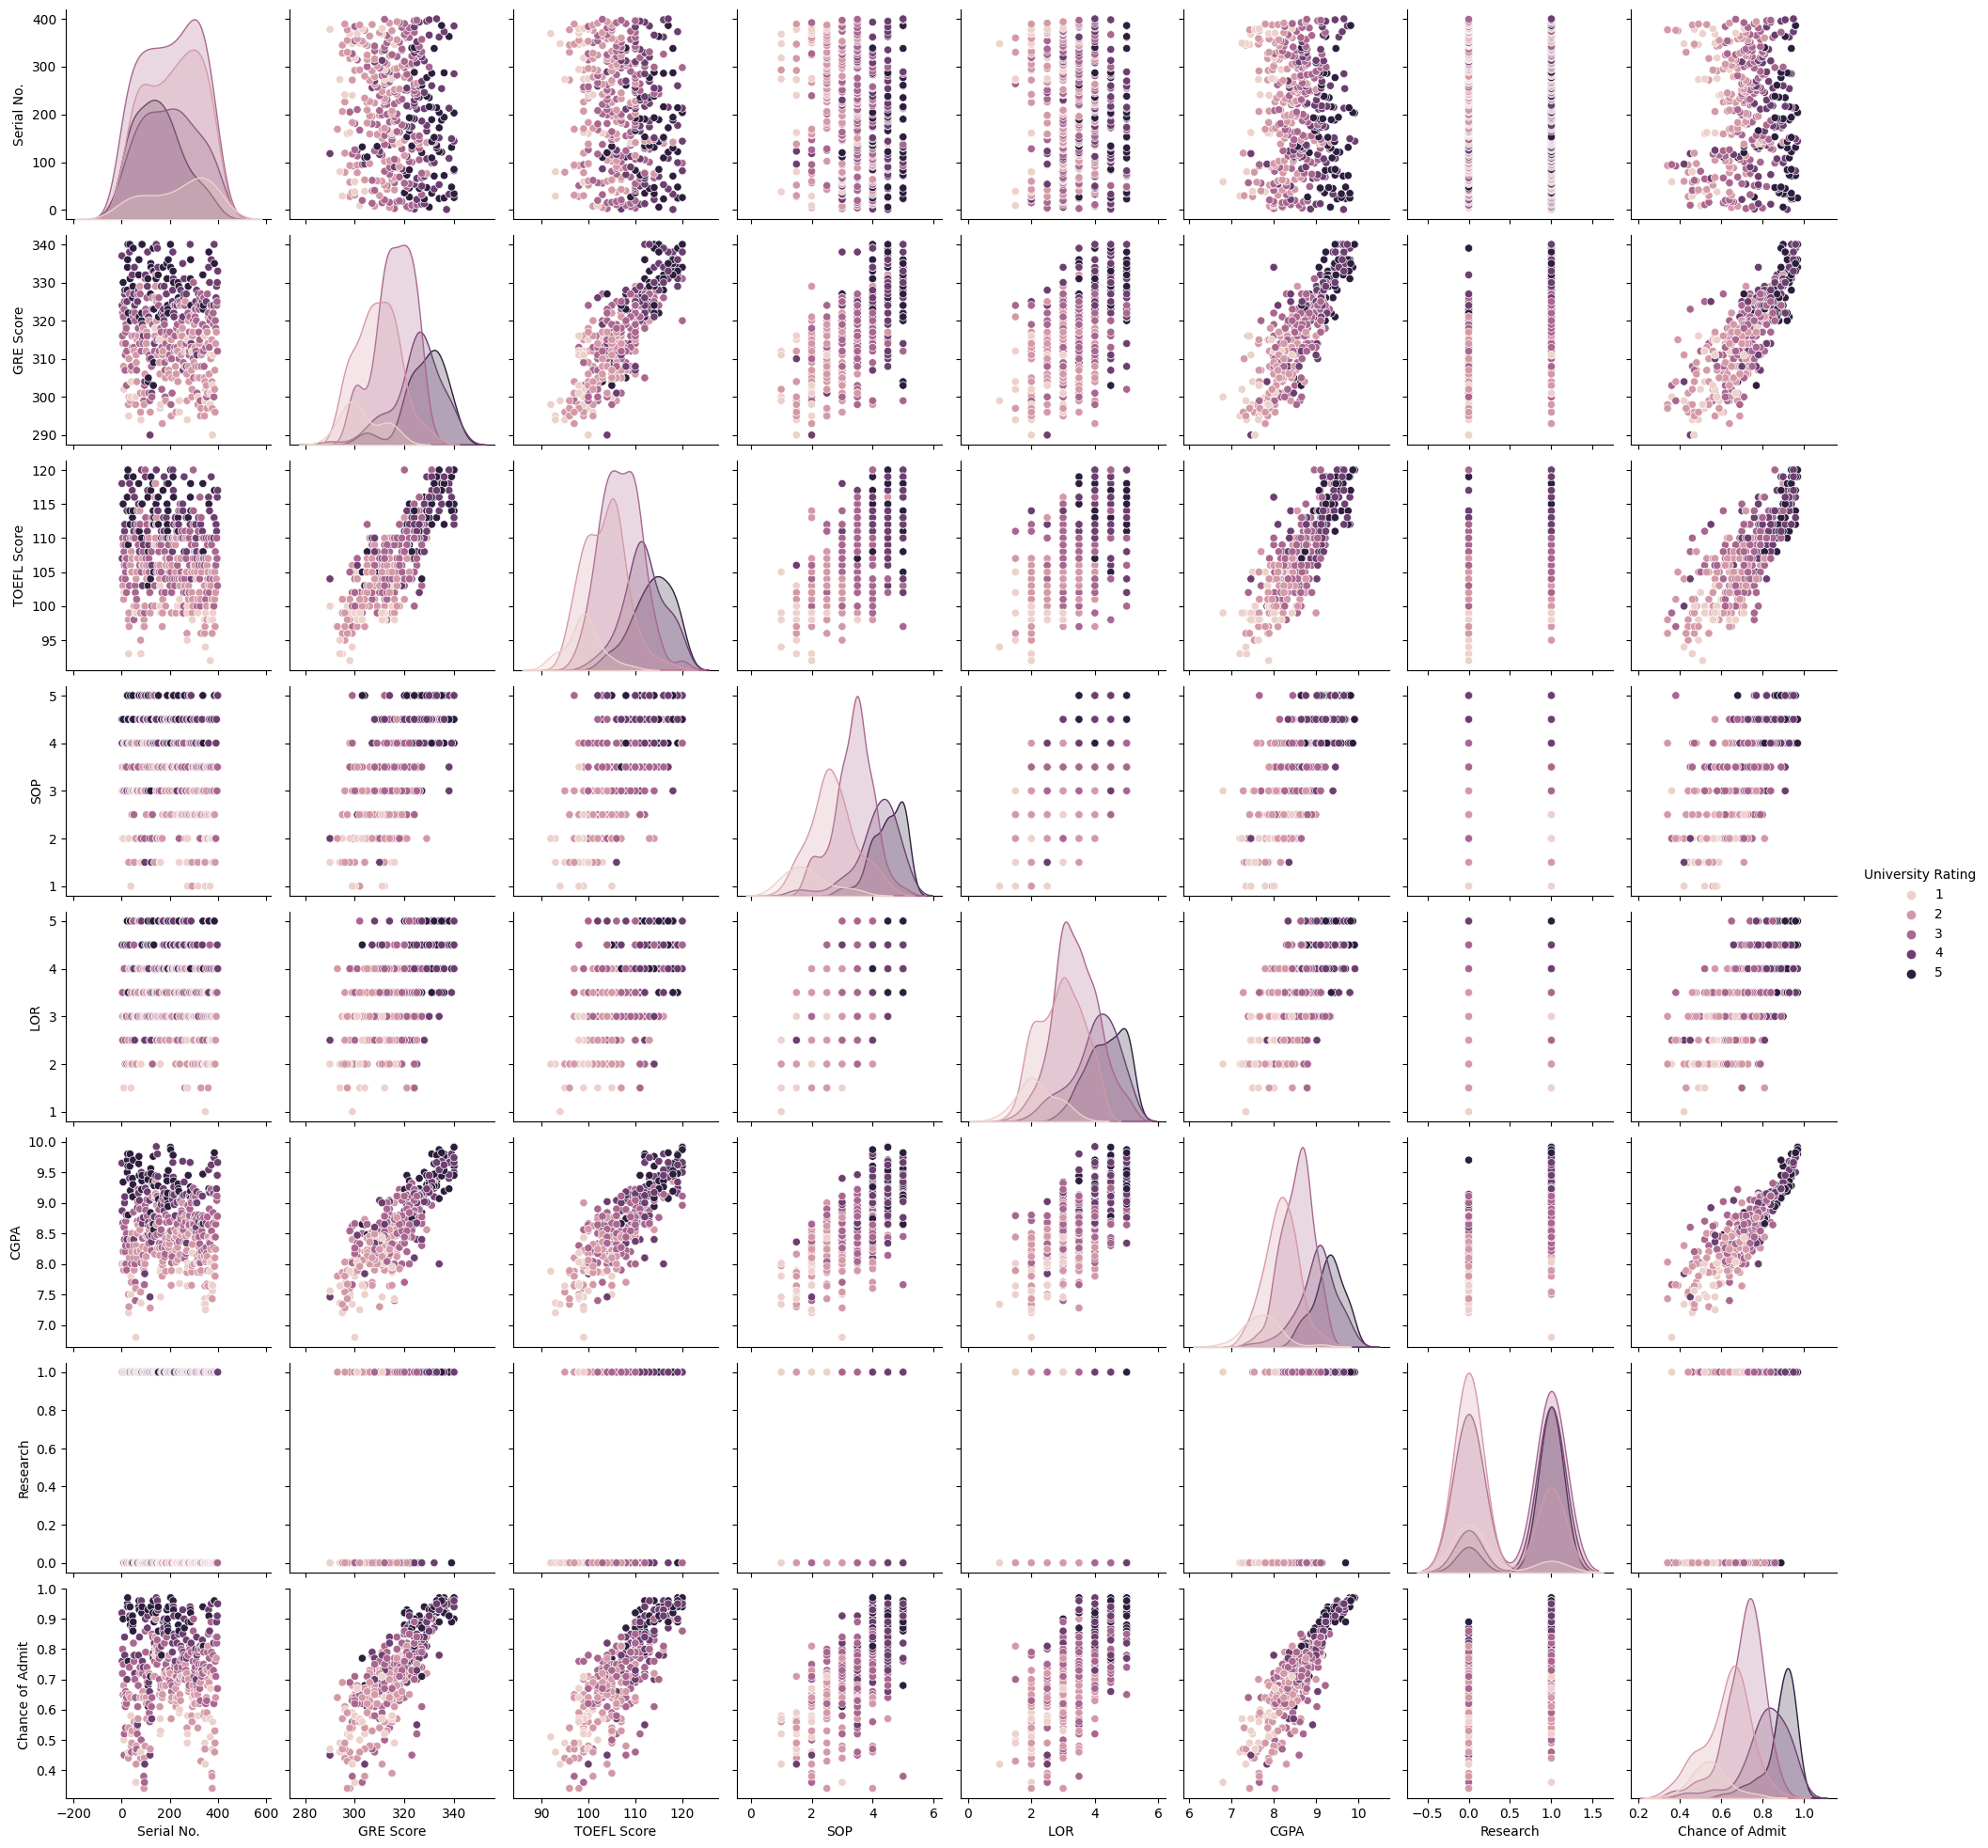

In [22]:
sns.pairplot(df, hue='University Rating')

### Ящик с усами

<Axes: xlabel='SOP'>

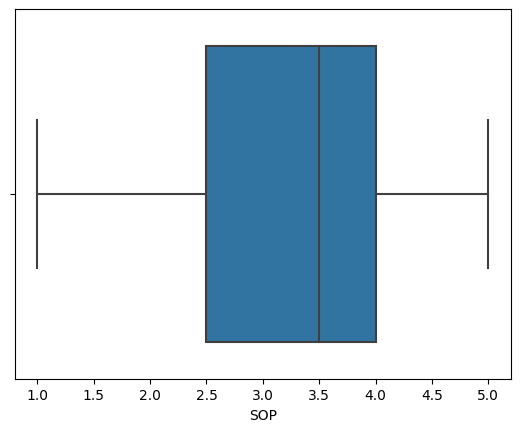

In [23]:
sns.boxplot(x=df['SOP'])

<Axes: ylabel='University Rating'>

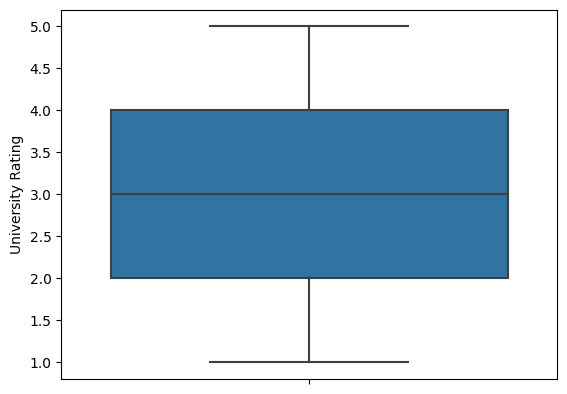

In [24]:
sns.boxplot(y=df['University Rating'])

### Скрипачная диаграмма

<Axes: xlabel='SOP'>

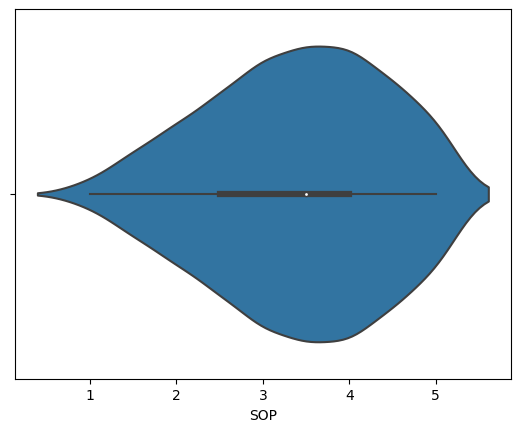

In [25]:
sns.violinplot(x=df['SOP'])

Скрипачная диаграмма показывает распределение плотности SOP очков.
### Сравним с гистограммой

<Axes: xlabel='SOP', ylabel='Count'>

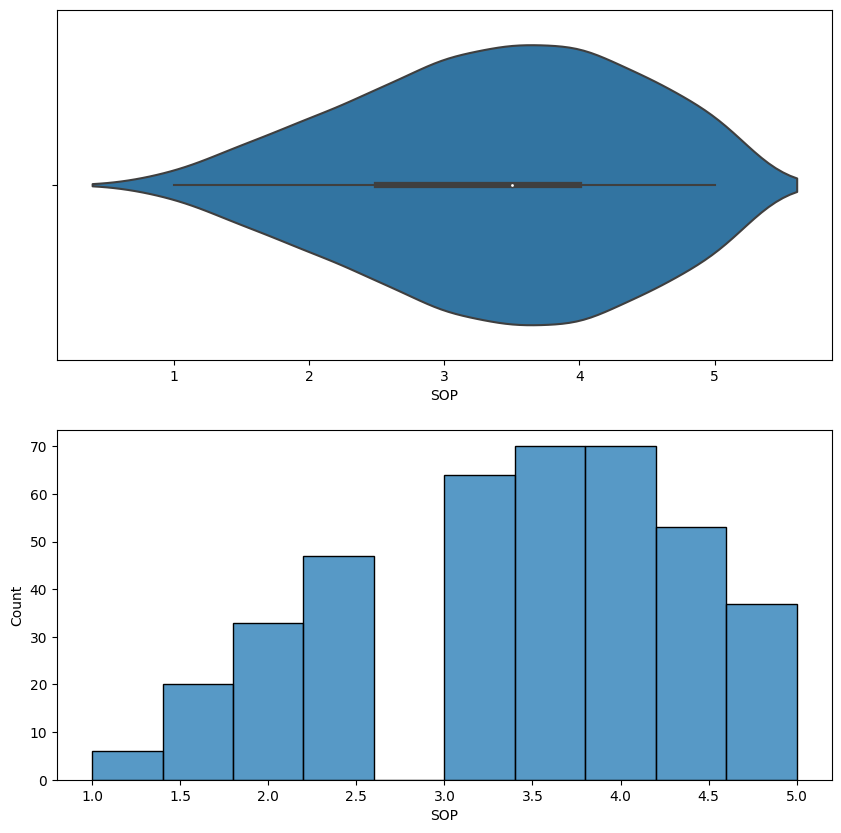

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['SOP'])
sns.histplot(df['SOP'])

Из гистрограммы видно, что скрипачная показывает распределение плотности SOP очков.